Мышковец С.А., v.1 06.03.2023

Решение задачи:

ДЗ - оценить возраст человека по изображению. 

Взять за основу любое предыдущее задание (если нет вычислительных ресурсов, то классификация заемщика, если есть, то классификация изображений или определение возраста, и реализовать стекинг несколькоих моделей). 

Требование: структуру моделе реализовать с использованием функций. 

Дополнительное требование (по возможности): структуру модели реализовать без использования последовательных API (через класс). Реализовать пользовательский цикл обучения. 
Фрэймворк выбора: на выбор учащегося. 

Основная задача ДЗ: отработать навыки самостоятельного написания моделей. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import cv2 # for ingesting images
print('OpenCV: %s' % cv2.__version__) # print version
import matplotlib 
import matplotlib.pyplot as plt # or data visualizationa
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version


import sys
import os

OpenCV: 4.7.0
matplotlib: 3.6.3
graphviz: 0.20.1


In [2]:
import os
main_dir = os.getcwd()

In [3]:
# Specify the location of images after you have downloaded them
ImgLocation = main_dir + "/UTKFace"

In [4]:
age = []
for file in os.listdir(ImgLocation):
    file = int(file.split('_')[0])
    age.append(file)

In [5]:
len(age)

23708

In [6]:
full_path = []
for file in os.listdir(ImgLocation):
    path = ImgLocation + '/' + file
    full_path.append(path)

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({'age': age,  
                   'full_path': full_path, 
                   }
                 )

In [9]:
df.head()

,age,full_path
0,9,/Users/sviatlanamyshkavets/Documents/Courses/D...
1,36,/Users/sviatlanamyshkavets/Documents/Courses/D...
2,86,/Users/sviatlanamyshkavets/Documents/Courses/D...
3,26,/Users/sviatlanamyshkavets/Documents/Courses/D...
4,1,/Users/sviatlanamyshkavets/Documents/Courses/D...


In [10]:
df.describe()

,age
count,23708.000000
mean,33.303484
std,19.886112
min,1.000000
25%,23.000000
50%,29.000000
75%,45.000000
max,116.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23708 non-null  int64 
 1   full_path  23708 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.6+ KB


# Выведем фотографии из файлов, частично проверим верность целевых меток.

**При помощи кода ниже пробежимся по папкам и проверим фото детей до 18 лет, удалим явные выбросы.**

In [ ]:
test = df[df['age']==1]
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in test['full_path']:
#     img = cv2.imread(file)
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.xlabel(i)
    print(i)
    plt.show()

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

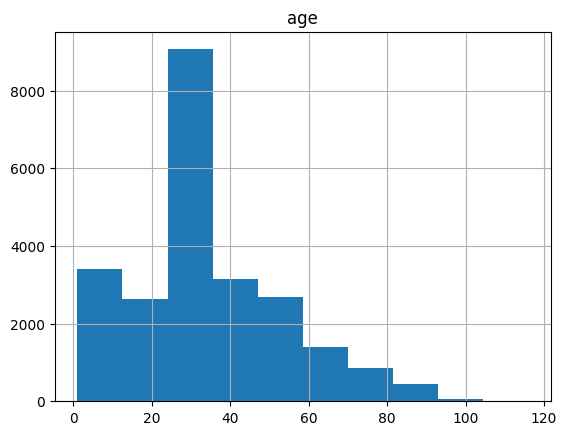

In [13]:
df.hist()

In [16]:
df.groupby('age')['age'].count().sort_values()

age
91       2
93       5
99       9
95       9
87      10
      ... 
24     859
35     880
28     918
1     1123
26    2197
Name: age, Length: 96, dtype: int64

In [15]:
index_age_100 = df[df['age']>99].index
df.drop(index_age_100 , inplace=True)

In [17]:
df_cut = df[['full_path', 'age']]

In [18]:
df_age_cut = []
for i in df_cut['age']:
    age = i//10
    df_age_cut.append(age)

In [19]:
df_cut['age_cut'] = df_age_cut

/var/folders/s8/yypls09j61bb1cjkz85h1n7c0000gn/T/ipykernel_29977/496406492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['age_cut'] = df_age_cut


In [20]:
df_cut

,full_path,age,age_cut
0,/Users/sviatlanamyshkavets/Documents/Courses/D...,9,0
1,/Users/sviatlanamyshkavets/Documents/Courses/D...,36,3
2,/Users/sviatlanamyshkavets/Documents/Courses/D...,86,8
3,/Users/sviatlanamyshkavets/Documents/Courses/D...,26,2
4,/Users/sviatlanamyshkavets/Documents/Courses/D...,1,0
...,...,...,...
23703,/Users/sviatlanamyshkavets/Documents/Courses/D...,35,3
23704,/Users/sviatlanamyshkavets/Documents/Courses/D...,52,5
23705,/Users/sviatlanamyshkavets/Documents/Courses/D...,26,2
23706,/Users/sviatlanamyshkavets/Documents/Courses/D...,28,2


In [21]:
df_cut = df_cut.drop(['age'], axis=1)

In [22]:
df_cut.head()

,full_path,age_cut
0,/Users/sviatlanamyshkavets/Documents/Courses/D...,0
1,/Users/sviatlanamyshkavets/Documents/Courses/D...,3
2,/Users/sviatlanamyshkavets/Documents/Courses/D...,8
3,/Users/sviatlanamyshkavets/Documents/Courses/D...,2
4,/Users/sviatlanamyshkavets/Documents/Courses/D...,0


In [23]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23707
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_path  23676 non-null  object
 1   age_cut    23676 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 554.9+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_cut['age_cut'] = labelencoder.fit_transform(df_cut['age_cut'])

**Разделим данные на тренировочную, тестовую и валидационную выборку.**

In [25]:
from sklearn.model_selection import train_test_split

y = df_cut['age_cut']
X = df_cut['full_path']


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

In [26]:
train_full, test= train_test_split(
    df_cut, test_size=0.3, stratify=df_cut['age_cut'], random_state=0)

In [27]:
train_full.groupby('age_cut')['age_cut'].count()

age_cut
0    2143
1    1072
2    5141
3    3176
4    1571
5    1609
6     923
7     489
8     353
9      96
Name: age_cut, dtype: int64

In [28]:
X_train_full.shape

(18940,)

In [29]:
train, valid = train_full[:-3940], train_full[-3940:]

In [32]:
test.shape

(7103, 2)

In [33]:
os.makedirs('train')

In [34]:
os.makedirs('test')

In [35]:
os.makedirs('valid')

In [36]:
train_files = []
for i in train['full_path']:
    train_files.append(i)
for a in train['age_cut']:
    train_files.append(a)

In [37]:
test_files = []
for i in test['full_path']:
    test_files.append(i)
for a in test['age_cut']:
    test_files.append(a)

In [38]:
valid_files = []
for i in valid['full_path']:
    valid_files.append(i)
for a in valid['age_cut']:
    valid_files.append(a)

In [39]:
# import shutil
import cv2
import numpy as np

In [40]:
train_dir = main_dir + '/train'
test_dir = main_dir + '/test'
valid_dir = main_dir + '/valid'

In [41]:
for filename in os.listdir(ImgLocation):
    if filename != '.DS_Store':
        # for i in os.listdir(ImgLocation + '/' + filename):
        file = ImgLocation + '/' + filename
        if file in train_files:
            img = cv2.imread(file)
            img = cv2.resize(img, (224, 224))
            if img.shape[2] == 1:
                img = np.dstack([img, img, img]) # Some images are in  greyscale (1 channel), 
                                                     # therefore convert them to 3 channel
            path = train_dir
            cv2.imwrite(os.path.join(path, filename), img)
        if file in test_files:
            img = cv2.imread(file)
            img = cv2.resize(img, (224, 224))
            if img.shape[2] == 1:
                img = np.dstack([img, img, img])
            path = test_dir
            cv2.imwrite(os.path.join(path, filename), img)
        if file in valid_files:
            img = cv2.imread(file)
            img = cv2.resize(img, (224, 224))
            if img.shape[2] == 1:
                img = np.dstack([img, img, img])
            path = valid_dir
            cv2.imwrite(os.path.join(path, filename), img)

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
train_datagen=ImageDataGenerator(rescale=1./255.)

In [44]:
test_datagen=ImageDataGenerator(rescale=1./255.)

In [45]:
valid_datagen=ImageDataGenerator(rescale=1./255.)

In [46]:
TARGET_SIZE = (224,224)

train_gen=train_datagen.flow_from_dataframe(
dataframe=train,
directory=main_dir + '/train',
x_col="full_path",
y_col="age_cut",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=TARGET_SIZE
)

valid_gen=train_datagen.flow_from_dataframe(
dataframe=valid,
directory=main_dir + '/valid',
x_col="full_path",
y_col="age_cut",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=TARGET_SIZE
)

test_gen=test_datagen.flow_from_dataframe(
dataframe=test,
directory=main_dir + '/test',
x_col="full_path",
y_col="age_cut",
batch_size=32,
seed=42,
shuffle=False,
class_mode="raw",
target_size=TARGET_SIZE
)

Found 12633 validated image filenames.
Found 3940 validated image filenames.
Found 7103 validated image filenames.


# Определим и обучим несколько моделей.

**Model**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-10 16:10:20.050388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-10 16:10:20.050482: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0

In [49]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(factor=0.2, patience=3)

checkpoint_cb = ModelCheckpoint("ConvModel.h5", 
                                     monitor = "val_accuracy",
                                     save_best_only=True)

In [51]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    callbacks=[checkpoint_cb, lr_scheduler],
                    epochs=10)

Epoch 1/10


2023-04-10 16:10:30.511284: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-10 16:10:30.719201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - ETA: 0s - loss: 1.5629 - accuracy: 0.4235

2023-04-10 16:11:08.239327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - 44s 111ms/step - loss: 1.5629 - accuracy: 0.4235 - val_loss: 1.6044 - val_accuracy: 0.4673 - lr: 0.0010
Epoch 2/10
395/395 [==============================] - 43s 109ms/step - loss: 1.2716 - accuracy: 0.5102 - val_loss: 1.3626 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 3/10
395/395 [==============================] - 43s 109ms/step - loss: 1.1248 - accuracy: 0.5602 - val_loss: 1.3506 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 4/10
395/395 [==============================] - 43s 109ms/step - loss: 0.9982 - accuracy: 0.6145 - val_loss: 1.3164 - val_accuracy: 0.4804 - lr: 0.0010
Epoch 5/10
395/395 [==============================] - 43s 109ms/step - loss: 0.8706 - accuracy: 0.6614 - val_loss: 1.4240 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 6/10
395/395 [==============================] - 43s 109ms/step - loss: 0.7316 - accuracy: 0.7217 - val_loss: 1.4783 - val_accuracy: 0.4891 - lr: 0.0010
Epoch 7/10
395/395 [==============================] - 43s 109ms

In [52]:
def test_val_graph (history,train,val):
    plt.plot(history.history[train], label='Точность на обучающем наборе')
    plt.plot(history.history[val], label='Точность на проверочном наборе')
    plt.xlabel('Цикл обучения')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()
    pass;

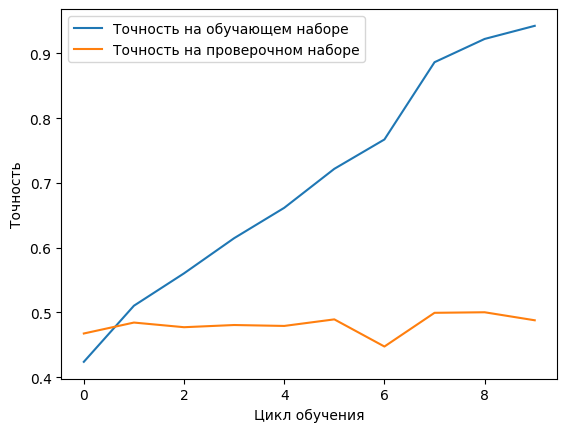

In [54]:
test_val_graph (history,'accuracy','val_accuracy')

In [55]:
model.evaluate (valid_gen)

124/124 [==============================] - 4s 31ms/step - loss: 2.4986 - accuracy: 0.5084


[2.4986178874969482, 0.5083756446838379]

**Model_1**

In [56]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D, Activation, GlobalMaxPool2D, GlobalAveragePooling2D, Input, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))
 
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))
          
model_1.add(Conv2D(128, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

model_1.add(Conv2D(256, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

model_1.add(Conv2D(512, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

model_1.add(Conv2D(256, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(GlobalMaxPool2D())
model_1.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GlobalMaxPool2D())
# model.add(Dropout(0.3))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GlobalMaxPool2D())
# model.add(Dropout(0.3))

model_1.add(Flatten())

model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [57]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)     

In [58]:
model_1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(factor=0.2, patience=3)

checkpoint_cb = ModelCheckpoint("ConvModel_1.h5", 
                                     monitor = "val_accuracy",
                                     save_best_only=True)

In [60]:
history_1 = model_1.fit(train_gen,
                    validation_data=test_gen,
                    callbacks=[checkpoint_cb, lr_scheduler],
                    epochs=10)

Epoch 1/10


2023-04-10 16:18:32.153420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - ETA: 0s - loss: 1.9866 - accuracy: 0.3076

2023-04-10 16:19:16.539597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - 51s 129ms/step - loss: 1.9866 - accuracy: 0.3076 - val_loss: 2.1771 - val_accuracy: 0.3102 - lr: 0.0010
Epoch 2/10
395/395 [==============================] - 50s 128ms/step - loss: 1.7122 - accuracy: 0.3805 - val_loss: 1.9712 - val_accuracy: 0.3727 - lr: 0.0010
Epoch 3/10
395/395 [==============================] - 50s 127ms/step - loss: 1.5746 - accuracy: 0.4187 - val_loss: 1.9924 - val_accuracy: 0.2410 - lr: 0.0010
Epoch 4/10
395/395 [==============================] - 50s 127ms/step - loss: 1.5142 - accuracy: 0.4377 - val_loss: 1.9277 - val_accuracy: 0.2392 - lr: 0.0010
Epoch 5/10
395/395 [==============================] - 50s 127ms/step - loss: 1.4686 - accuracy: 0.4472 - val_loss: 1.6909 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 6/10
395/395 [==============================] - 50s 127ms/step - loss: 1.4375 - accuracy: 0.4525 - val_loss: 1.6928 - val_accuracy: 0.4514 - lr: 0.0010
Epoch 7/10
395/395 [==============================] - 50s 127ms

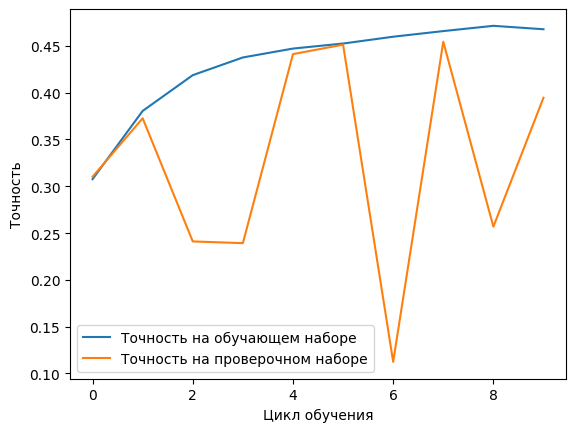

In [61]:
test_val_graph (history_1,'accuracy','val_accuracy')

In [62]:
model_1.evaluate (valid_gen)

124/124 [==============================] - 4s 32ms/step - loss: 1.6979 - accuracy: 0.3949


[1.6978559494018555, 0.3949238657951355]

**Custom model**

In [63]:
target_size = (224,224,3) 
input = Input(shape= target_size) 

x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input) 
x = MaxPool2D(2,2)(x) 

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(2,2)(x) 

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(2,2)(x) 

x = Conv2D(filters=256, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(2,2)(x) 
x = GlobalMaxPool2D()(x)
x = Dropout(0.25)(x) 
x = Flatten()(x) 
x = Dense(units=128, activation='relu')(x) 
x = Dense(units=64, activation='relu')(x) 
output = Dense(units=10, activation='softmax')(x) 

custom_model  = Model(input, output, name= 'Custom_Model')

In [64]:
custom_model.summary()

Model: "Custom_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)      

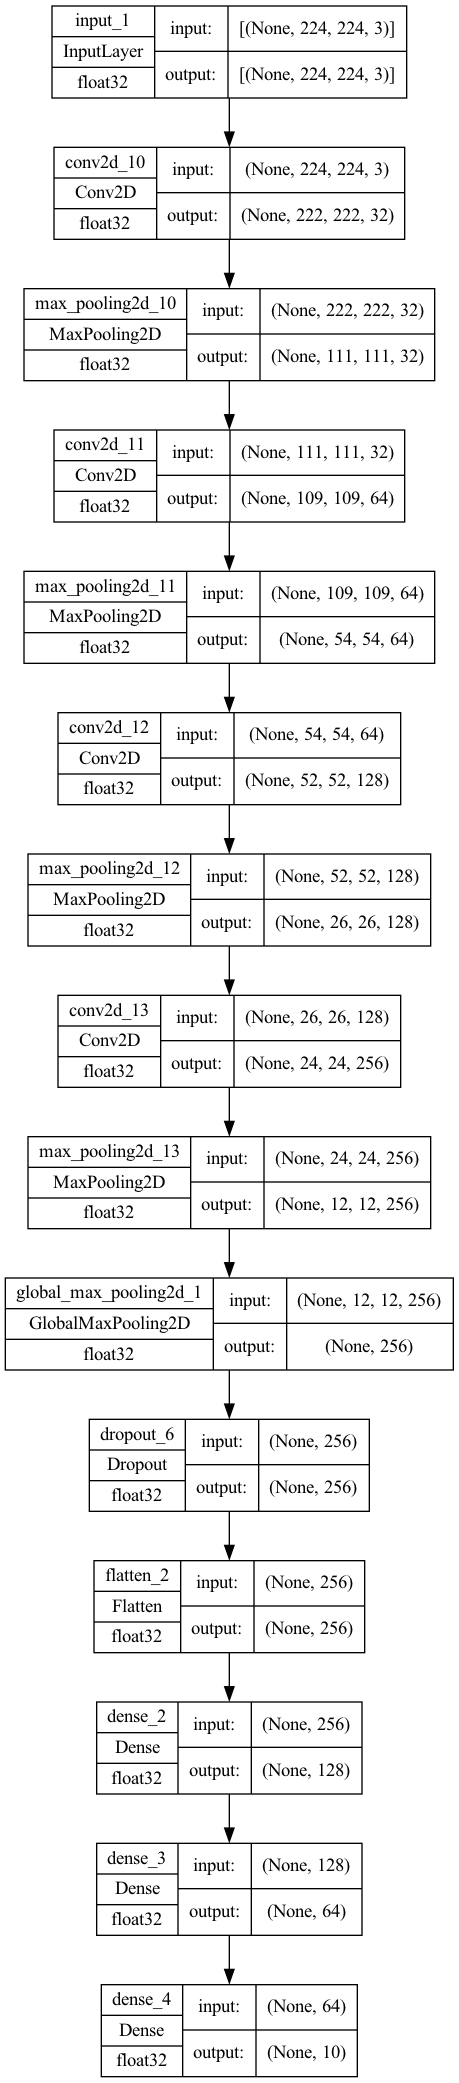

In [65]:
# show model structure 
from tensorflow.keras.utils import plot_model 
plot_model(custom_model,show_shapes=True,
    show_dtype=True,
    show_layer_names=True)

In [66]:
# compile model
custom_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

# initialize callbacks 
reduceLR = ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

early_stopping = EarlyStopping(monitor='val_loss', patience = 5 , verbose=1, mode='min', restore_best_weights= True) 

checkpoint = ModelCheckpoint('CustomModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

callbacks= [reduceLR, early_stopping,checkpoint]

In [67]:
epochs = 10 
custom_model.fit(train_gen, validation_data=test_gen, epochs= epochs, callbacks= callbacks)

Epoch 1/10


2023-04-10 16:30:09.338283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - ETA: 0s - loss: 1.8883 - accuracy: 0.3343

2023-04-10 16:30:42.886405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.73025, saving model to CustomModel.weights.hdf5
395/395 [==============================] - 40s 99ms/step - loss: 1.8883 - accuracy: 0.3343 - val_loss: 1.7303 - val_accuracy: 0.3835 - lr: 0.0010
Epoch 2/10
395/395 [==============================] - ETA: 0s - loss: 1.7138 - accuracy: 0.3804
Epoch 2: val_loss did not improve from 1.73025
395/395 [==============================] - 39s 98ms/step - loss: 1.7138 - accuracy: 0.3804 - val_loss: 1.7452 - val_accuracy: 0.3752 - lr: 0.0010
Epoch 3/10
395/395 [==============================] - ETA: 0s - loss: 1.6329 - accuracy: 0.3984
Epoch 3: val_loss improved from 1.73025 to 1.60410, saving model to CustomModel.weights.hdf5
395/395 [==============================] - 39s 97ms/step - loss: 1.6329 - accuracy: 0.3984 - val_loss: 1.6041 - val_accuracy: 0.4031 - lr: 0.0010
Epoch 4/10
395/395 [==============================] - ETA: 0s - loss: 1.5625 - accuracy: 0.4154
Epoch 4: val_loss improved from 1.60410 to 1

In [68]:
import tensorflow as tf
model =  tf.keras.models.load_model('CustomModel.weights.hdf5')

In [69]:
# Evaluate the model 
model.evaluate(valid_gen)

  1/124 [..............................] - ETA: 24s - loss: 1.3079 - accuracy: 0.4688

2023-04-10 16:36:47.198597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 4s 28ms/step - loss: 1.3453 - accuracy: 0.4820


[1.3452929258346558, 0.48197969794273376]

**VGG16 model**

In [70]:
# Import the VGG16 pretrained model 
from tensorflow.keras.applications import VGG16 

vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False) 

for i in vgg16.layers[:-3]:
    i.trainable = False 

# build model 
input = vgg16.layers[-1].output # input is the last output from vgg16 

x = Dropout(0.25)(input) 
x = Flatten()(x) 
output = Dense(10, activation='softmax')(x) 

# create the model 
vgg16_model = Model(vgg16.input, output, name='VGG16_Model')

In [71]:
vgg16_model.summary()

Model: "VGG16_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       

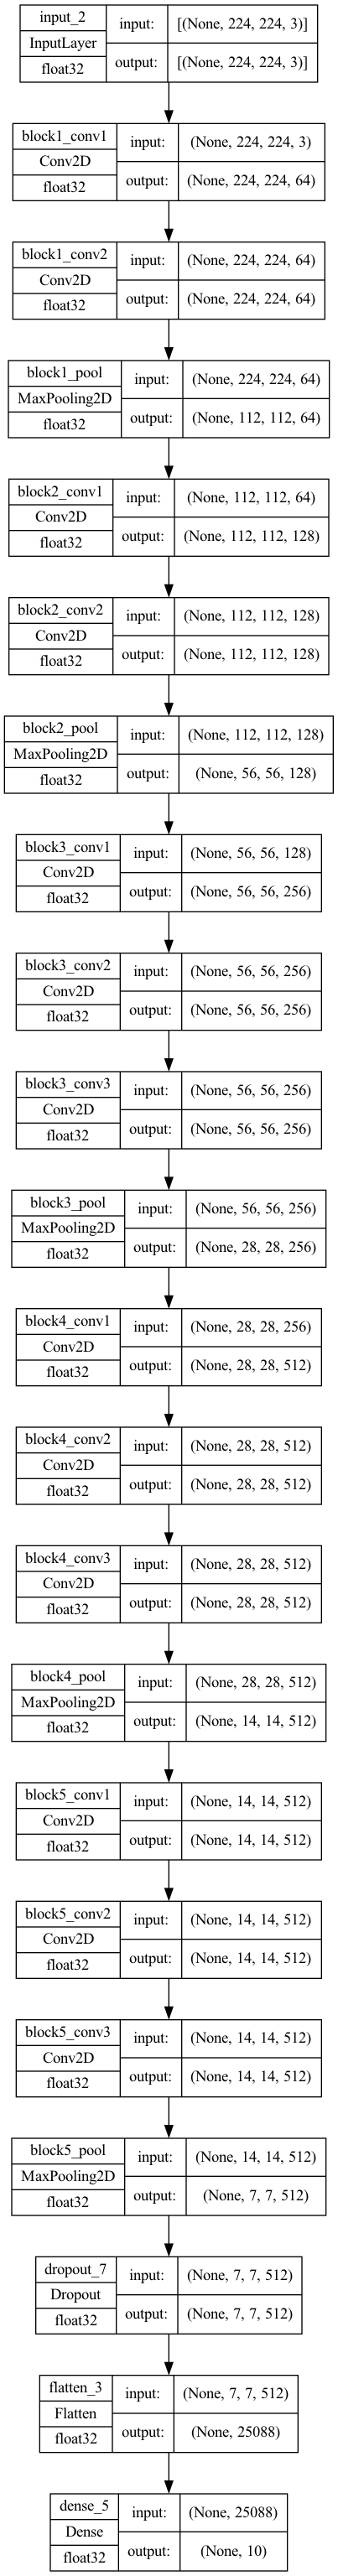

In [72]:
# show model structure 
from tensorflow.keras.utils import plot_model 
plot_model(vgg16_model,show_shapes=True,
    show_dtype=True,
    show_layer_names=True)

In [73]:
# compile the model 
import tensorflow as tf
vgg16_model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) 

# reinitialize callbacks 
checkpoint = ModelCheckpoint('VggModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

callbacks= [reduceLR, early_stopping,checkpoint] 

In [74]:
# Train model 
vgg16_model.fit(train_gen, validation_data=test_gen, epochs= epochs, callbacks= callbacks)

Epoch 1/10


2023-04-10 16:37:11.238472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - ETA: 0s - loss: 1.7389 - accuracy: 0.3769

2023-04-10 16:39:03.370893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.48809, saving model to VggModel.weights.hdf5
395/395 [==============================] - 168s 424ms/step - loss: 1.7389 - accuracy: 0.3769 - val_loss: 1.4881 - val_accuracy: 0.4474 - lr: 0.0010
Epoch 2/10
395/395 [==============================] - ETA: 0s - loss: 1.4532 - accuracy: 0.4515
Epoch 2: val_loss improved from 1.48809 to 1.37695, saving model to VggModel.weights.hdf5
395/395 [==============================] - 167s 423ms/step - loss: 1.4532 - accuracy: 0.4515 - val_loss: 1.3770 - val_accuracy: 0.4756 - lr: 0.0010
Epoch 3/10
395/395 [==============================] - ETA: 0s - loss: 1.3338 - accuracy: 0.4907
Epoch 3: val_loss improved from 1.37695 to 1.35973, saving model to VggModel.weights.hdf5
395/395 [==============================] - 167s 423ms/step - loss: 1.3338 - accuracy: 0.4907 - val_loss: 1.3597 - val_accuracy: 0.4857 - lr: 0.0010
Epoch 4/10
395/395 [==============================] - ETA: 0s - loss: 1.2586 - accuracy: 0.5163
E

In [75]:
vgg16_model =  tf.keras.models.load_model('VggModel.weights.hdf5')

In [77]:
# Evaluate the model 
vgg16_model.evaluate(valid_gen)

124/124 [==============================] - 31s 251ms/step - loss: 1.1949 - accuracy: 0.5254


[1.194933533668518, 0.5253807306289673]

**MobileNet model**

In [78]:
# initializing the mobilenet model
import tensorflow as tf
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)

# freezing all but the last 5 layers
for layer in mobilenet.layers[:-5]:
  layer.trainable = False

# add few mor layers
x = mobilenet.layers[-1].output
x = Dropout(0.5)(x)
x = Flatten()(x) 
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Create the model
mobilenet_model = Model(mobilenet.input, output, name= "Mobilenet_Model")

In [79]:
mobilenet_model.summary()

Model: "Mobilenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                            

In [80]:
# compile the model 
mobilenet_model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) 

# reinitialize callbacks 
checkpoint = ModelCheckpoint('MobilenetModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

callbacks= [reduceLR, early_stopping,checkpoint] 

In [81]:
# model training 
mobilenet_model.fit(train_gen, validation_data=test_gen, epochs=epochs, callbacks= callbacks)

Epoch 1/10


2023-04-10 17:09:14.747797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - ETA: 0s - loss: 2.1403 - accuracy: 0.2515

2023-04-10 17:09:38.163598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.76989, saving model to MobilenetModel.weights.hdf5
395/395 [==============================] - 35s 82ms/step - loss: 2.1403 - accuracy: 0.2515 - val_loss: 1.7699 - val_accuracy: 0.3631 - lr: 0.0010
Epoch 2/10
395/395 [==============================] - ETA: 0s - loss: 1.8778 - accuracy: 0.3281
Epoch 2: val_loss improved from 1.76989 to 1.61673, saving model to MobilenetModel.weights.hdf5
395/395 [==============================] - 31s 78ms/step - loss: 1.8778 - accuracy: 0.3281 - val_loss: 1.6167 - val_accuracy: 0.4221 - lr: 0.0010
Epoch 3/10
395/395 [==============================] - ETA: 0s - loss: 1.7319 - accuracy: 0.3666
Epoch 3: val_loss improved from 1.61673 to 1.52369, saving model to MobilenetModel.weights.hdf5
395/395 [==============================] - 31s 78ms/step - loss: 1.7319 - accuracy: 0.3666 - val_loss: 1.5237 - val_accuracy: 0.4267 - lr: 0.0010
Epoch 4/10
395/395 [==============================] - ETA: 0s - loss: 1.6293 - accura

In [82]:
mobilenet_model =  tf.keras.models.load_model('MobilenetModel.weights.hdf5')

In [83]:
# Evaluate the model 
mobilenet_model.evaluate(valid_gen)

2023-04-10 17:16:14.670789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 7s 49ms/step - loss: 1.3335 - accuracy: 0.5003


[1.3335410356521606, 0.5002537965774536]

# Ансамбль конкатенации

In [94]:
# concatenate the models

# import concatenate layer
from tensorflow.keras.layers import Concatenate

# get list of models
models = [model, model_1, vgg16_model, mobilenet_model] 

input = Input(shape=(224, 224, 3), name='input') # input layer

# get output for each model input
outputs = [model(input) for model in models]

# contenate the ouputs
x = Concatenate()(outputs) 

# add further layers
x = Dropout(0.5)(x) 
output = Dense(10, activation='softmax', name='output')(x) # output layer

# create concatenated model
conc_model = Model(input, output, name= 'Concatenated_Model')

In [95]:
conc_model.summary()

Model: "Concatenated_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Custom_Model (Functional)      (None, 10)           430218      ['input[0][0]']                  
                                                                                                  
 sequential_1 (Sequential)      (None, 10)           2751178     ['input[0][0]']                  
                                                                                                  
 VGG16_Model (Functional)       (None, 10)           14965578    ['input[0][0]'] 

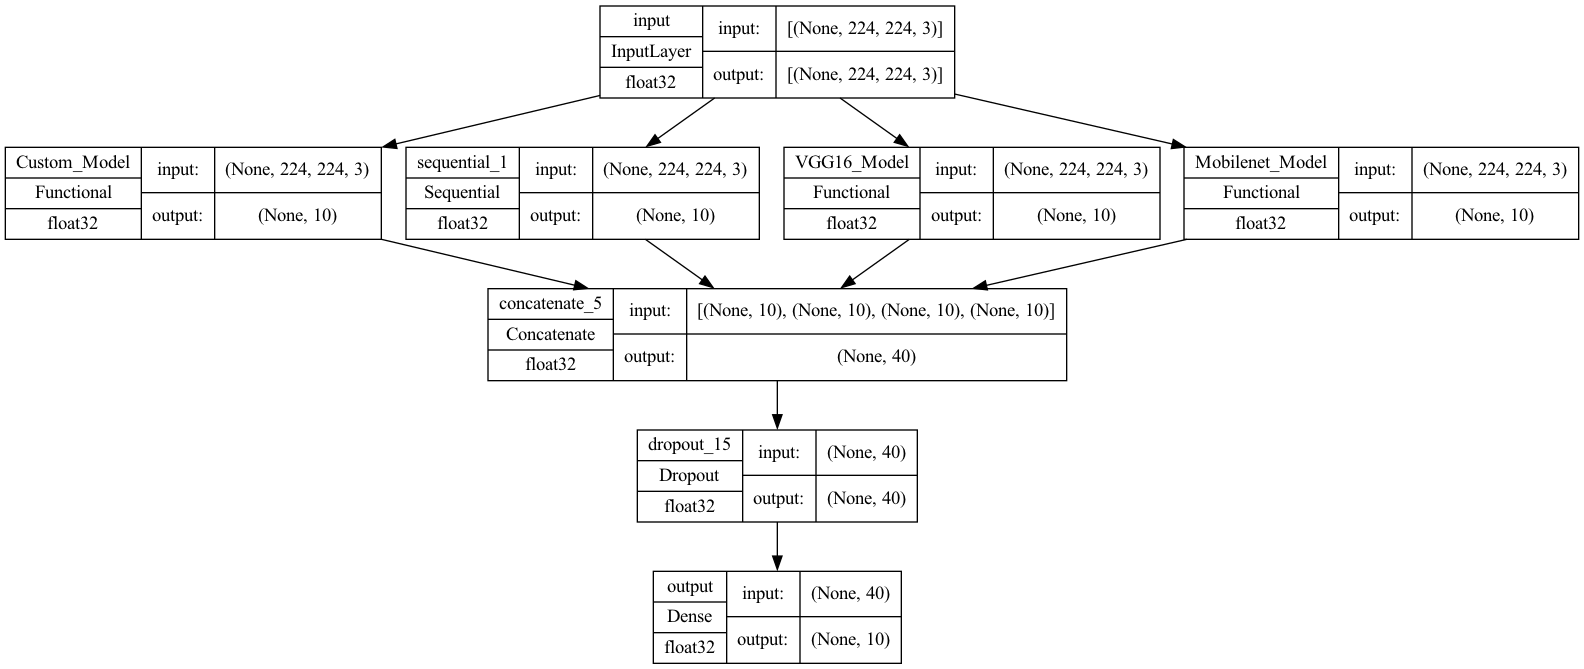

In [96]:
# show model structure 
from tensorflow.keras.utils import plot_model 
plot_model(conc_model,show_shapes=True,
    show_dtype=True,
    show_layer_names=True)

In [99]:
# compile the model 
conc_model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) 

In [100]:
conc_model.fit(train_gen, validation_data=test_gen, epochs= 10, callbacks= callbacks)

Epoch 1/10


2023-04-10 17:29:14.368021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - ETA: 0s - loss: 2.0869 - accuracy: 0.3024

2023-04-10 17:32:37.315067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss did not improve from 1.32545
395/395 [==============================] - 280s 704ms/step - loss: 2.0869 - accuracy: 0.3024 - val_loss: 2.0130 - val_accuracy: 0.4546 - lr: 0.0010
Epoch 2/10
395/395 [==============================] - ETA: 0s - loss: 1.9713 - accuracy: 0.3766
Epoch 2: val_loss did not improve from 1.32545
395/395 [==============================] - 275s 695ms/step - loss: 1.9713 - accuracy: 0.3766 - val_loss: 1.9311 - val_accuracy: 0.4491 - lr: 0.0010
Epoch 3/10
395/395 [==============================] - ETA: 0s - loss: 1.8983 - accuracy: 0.4214
Epoch 3: val_loss did not improve from 1.32545
395/395 [==============================] - 273s 690ms/step - loss: 1.8983 - accuracy: 0.4214 - val_loss: 1.8666 - val_accuracy: 0.4452 - lr: 0.0010
Epoch 4/10
395/395 [==============================] - ETA: 0s - loss: 1.8453 - accuracy: 0.4357
Epoch 4: val_loss did not improve from 1.32545
395/395 [==============================] - 273s 692ms/step - loss: 1.8453 - acc

In [101]:
conc_model.evaluate(valid_gen)

124/124 [==============================] - 42s 339ms/step - loss: 1.6572 - accuracy: 0.4723


[1.657179355621338, 0.47233501076698303]

In [102]:
conc_model.save("conc_model.h5")

In [104]:
conc_model = tf.keras.models.load_model('conc_model.h5')

In [105]:
conc_model.evaluate(valid_gen)

2023-04-10 18:17:23.365578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 43s 343ms/step - loss: 1.6572 - accuracy: 0.4723


[1.6571789979934692, 0.47233501076698303]

# Вывод

Улучшения результата конкатенация моделей не дала.

Индивидуальные показатели некоторых моделей на тестовой выборке были выше.

Лучший результат у модели VGG16 - точность 0.53 на тестовой выборке, 0.6 на тренировочной.

Лучший результат на тренировочной выборке у model - 0.94, но на тестовой выборке всего 0.5
